In [4]:
!pip install nltk==3.8.1

In [5]:
!pip install gradio

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
#nltk.download('punkt') #tokenizes the words or sentences into tokens or chunks.
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize #with punkt
from nltk.stem import WordNetLemmatizer
import re
import string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df= pd.read_csv("/content/ToxicData.csv")
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


# EDA (Exporatory Data Analysis)


In [8]:

##EDA
df.sample(n=7000, random_state=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(159571, 8)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
type(df.columns)

pandas.core.indexes.base.Index

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df.shape

(159571, 8)

In [13]:
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
class_counts= df[target_columns].sum()
print(class_counts)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


<Axes: >

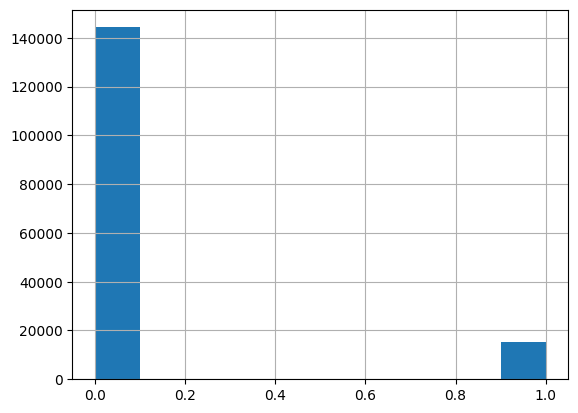

In [ ]:
df['comment_text'].value_counts()
df['toxic'].hist()

<Axes: >

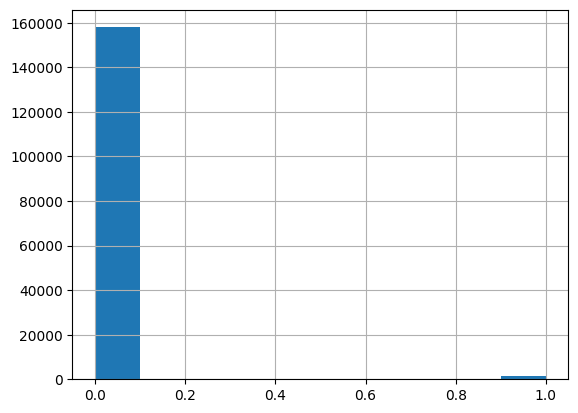

In [ ]:
df['comment_text'].value_counts()
df['severe_toxic'].hist()

<Axes: >

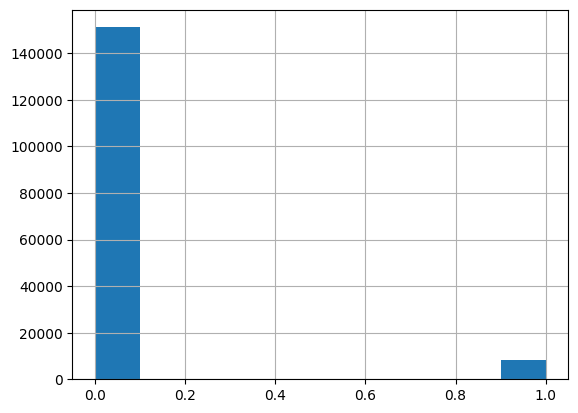

In [ ]:
df['comment_text'].value_counts()
df['obscene'].hist()

<Axes: >

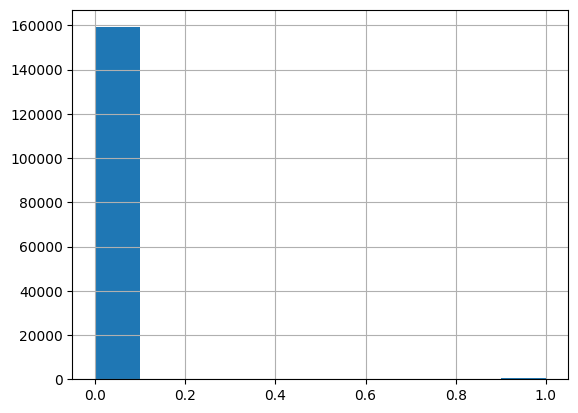

In [ ]:
df['comment_text'].value_counts()
df['threat'].hist()

<Axes: >

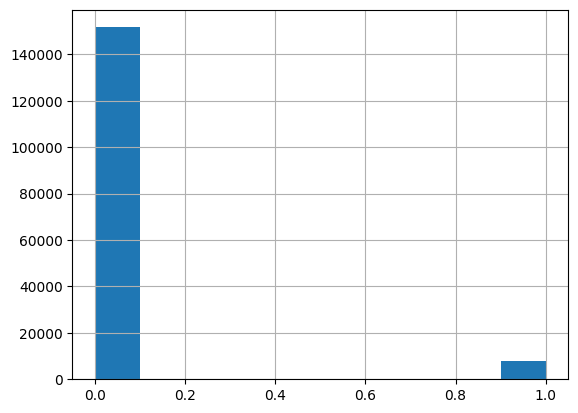

In [ ]:
df['comment_text'].value_counts()
df['insult'].hist()

<Axes: >

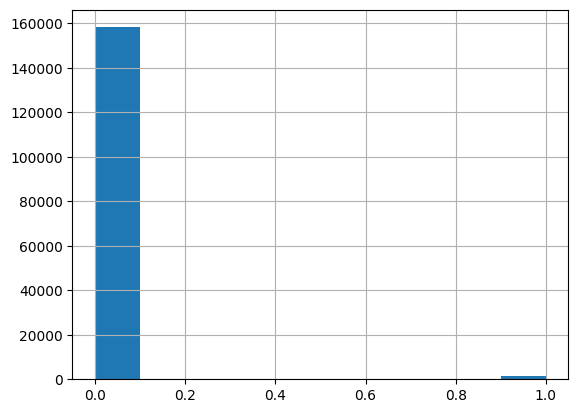

In [ ]:
df['comment_text'].value_counts()
df['identity_hate'].hist()

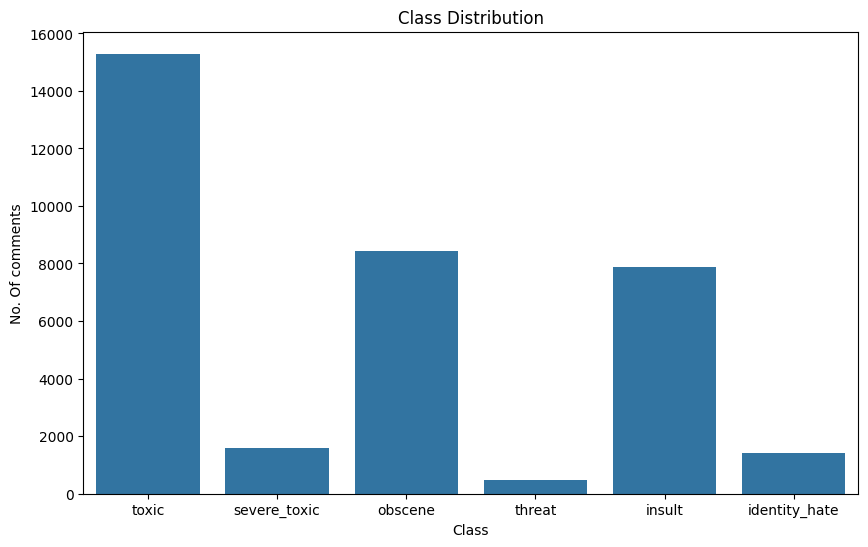

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('No. Of comments')
plt.title('Class Distribution')
plt.show()

In [ ]:
df['label_count']= df[target_columns].sum(axis=1)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [ ]:
df['all_classes']= df[target_columns].sum(axis=1)==6
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label_count,all_classes
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,False
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,False
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,False
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,False
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,False


In [ ]:
print(df['all_classes'].value_counts())
classes_count= df['all_classes'].sum()
print(f"{classes_count}")

all_classes
False    159540
True         31
Name: count, dtype: int64
31


In [9]:
df['comment_length']= df['comment_text'].apply(len)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


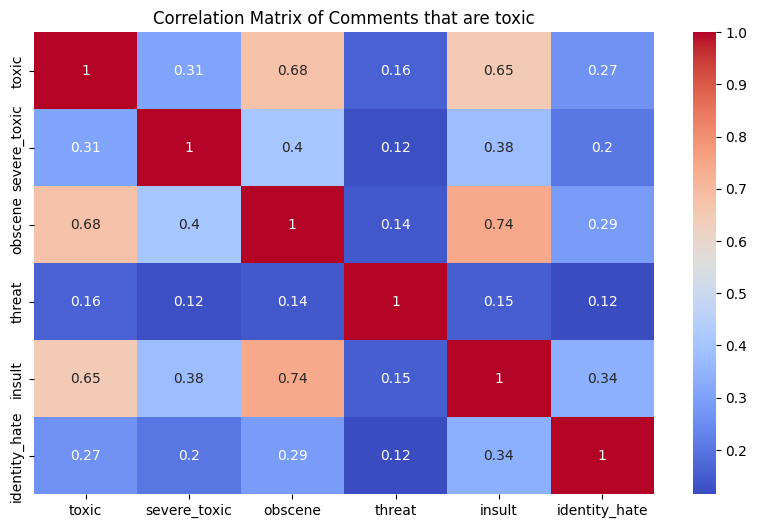

In [14]:
#correlation
correlation_matrix= df[target_columns].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Comments that are toxic')
plt.show()

In [15]:
#precalculate the stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

AttributeError: 'set' object has no attribute 'words'

In [16]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud
stopwords = set(STOPWORDS)
def generate_word_cloud(text,col):
  wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
  plt.figure(figsize=(8,8))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

Enter class name to generate the wordcloud:toxic


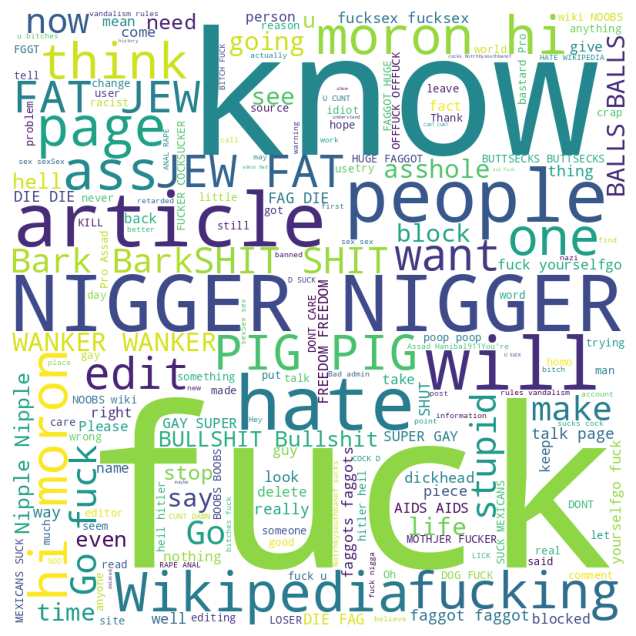

In [17]:
#generate display:
texts= input("Enter class name to generate the wordcloud:")
class_comments= df[df[texts]==1]['comment_text']
toxic_text = ' '.join(class_comments)
generate_word_cloud(toxic_text, texts)

In [18]:
df.loc[1,'comment_text']


"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

# Pre-Processing Data

In [19]:
#Pre-Processing
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters
  text = text.lower()  # Convert to lowercase
  tokens = text.split()  # Tokenize
  #precalculate the stopwords
  tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation and len(word)>1]  # Remove stop words
  tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
  pre=' '.join(tokens)
  return pre
df['cleaned_text'] = df['comment_text'].apply(preprocess_text)


In [20]:
print(df['cleaned_text'])

0         explanation edits made username hardcore metal...
1         daww match background colour im seemingly stuc...
2         hey man im really trying edit war guy constant...
3         cant make real suggestion improvement wondered...
4                       sir hero chance remember page thats
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really dont think understand came idea bad rig...
Name: cleaned_text, Length: 159571, dtype: object


# Train_Test_Split

In [21]:
#train_test_split
comments=df['cleaned_text']
y= df[target_columns]

In [22]:
#train-test-split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(comments,y, random_state= 42, test_size=0.2)


# TF-IDF
(Term Frequency- Inverse Document Frequency)

In [23]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(Xtrain)
X_test_tfidf = tfidf_vectorizer.transform(Xtest)

# Bag Of Words (BoW)

In [24]:
#BoW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_BoW= vectorizer.fit_transform(Xtrain)
X_test_BoW= vectorizer.transform(Xtest)


# Decision Tree (Multi-Classification Problem)

In [ ]:
#Algorihtms- DECISION TREE
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#BoW
classifier = MultiOutputClassifier(DecisionTreeClassifier())
classifier.fit(X_train_BoW, Ytrain)

MultiOutputClassifier(estimator=DecisionTreeClassifier())

In [ ]:
#TF-IDF
classifier1 = MultiOutputClassifier(DecisionTreeClassifier())
classifier1.fit(X_train_tfidf, Ytrain)

MultiOutputClassifier(estimator=DecisionTreeClassifier())

In [ ]:
pred_tfidf= classifier.predict(X_test_tfidf)
print(pred_tfidf)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [ ]:
pred= classifier.predict(X_test_BoW)
print(pred)

[[1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]]


## Metrics

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
# TFIDF
f1= f1_score(Ytest, pred_tfidf, average='weighted')
print(f"F1_score={f1}")
clas= classification_report(Ytest, pred_tfidf)
print("Classification Report")
print(f"{clas}")
acc=accuracy_score(Ytest, pred_tfidf)
print(f"Accuracy={acc}")

F1_score=0.27119270392130784
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.19      0.31      3056
           1       0.44      0.02      0.05       321
           2       0.88      0.18      0.30      1715
           3       0.17      0.01      0.03        74
           4       0.79      0.15      0.25      1614
           5       0.70      0.08      0.14       294

   micro avg       0.84      0.16      0.27      7074
   macro avg       0.64      0.11      0.18      7074
weighted avg       0.82      0.16      0.27      7074
 samples avg       0.02      0.01      0.01      7074

Accuracy=0.901926993576688


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# BoW
f1= f1_score(Ytest, pred, average='weighted')
print(f"F1_score={f1}")
clas= classification_report(Ytest, pred)
print("Classification Report")
print(f"{clas}")
acc=accuracy_score(Ytest, pred)
print(f"Accuracy={acc}")

F1_score=0.6469888499246089
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      3056
           1       0.34      0.27      0.30       321
           2       0.76      0.74      0.75      1715
           3       0.19      0.24      0.21        74
           4       0.61      0.57      0.59      1614
           5       0.45      0.34      0.39       294

   micro avg       0.66      0.64      0.65      7074
   macro avg       0.51      0.47      0.49      7074
weighted avg       0.66      0.64      0.65      7074
 samples avg       0.06      0.06      0.06      7074

Accuracy=0.8894563684787717


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Naive Bayes Algorithm

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier


In [21]:
#BoW
naive= MultiOutputClassifier(MultinomialNB())
naive.fit(X_train_BoW, Ytrain)

MultiOutputClassifier(estimator=MultinomialNB())

In [22]:
npred= naive.predict(X_test_BoW)
print(npred)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [1 0 1 0 1 0]
 [0 0 0 0 0 0]]


In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [25]:
f1= f1_score(Ytest, npred, average='weighted')
print(f"F1_score={f1}")
clas= classification_report(Ytest,npred)
print("Classification Report")
print(f"{clas}")
acc=accuracy_score(Ytest, npred)
print(f"Accuracy={acc}")

F1_score=0.6165039325407248
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.58      0.68      3056
           1       0.43      0.39      0.41       321
           2       0.80      0.56      0.66      1715
           3       0.21      0.05      0.09        74
           4       0.73      0.49      0.59      1614
           5       0.39      0.14      0.20       294

   micro avg       0.76      0.52      0.62      7074
   macro avg       0.56      0.37      0.44      7074
weighted avg       0.76      0.52      0.62      7074
 samples avg       0.05      0.04      0.04      7074

Accuracy=0.9073789754034153


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
#TF-IDF
naive1= MultiOutputClassifier(MultinomialNB())
naive1.fit(X_train_tfidf, Ytrain)

MultiOutputClassifier(estimator=MultinomialNB())

In [27]:
npred1= naive1.predict(X_test_tfidf)
print(npred1)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [29]:
f1= f1_score(Ytest, npred1, average='weighted')
print(f"F1_score={f1}")
clas= classification_report(Ytest,npred1)
print("Classification Report")
print(f"{clas}")
acc=accuracy_score(Ytest, npred1)
print(f"Accuracy={acc}")

F1_score=0.18838078755406817
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.17      0.29      3056
           1       0.00      0.00      0.00       321
           2       0.99      0.10      0.19      1715
           3       0.00      0.00      0.00        74
           4       1.00      0.04      0.07      1614
           5       0.00      0.00      0.00       294

   micro avg       0.99      0.11      0.19      7074
   macro avg       0.50      0.05      0.09      7074
weighted avg       0.90      0.11      0.19      7074
 samples avg       0.02      0.01      0.01      7074

Accuracy=0.8997023343255522


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

# LGBM Classification

In [33]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 5.8 MB/s eta 0:00:00


In [27]:
from sklearn.multioutput import MultiOutputClassifier
from lightgbm import LGBMClassifier

In [43]:
X_train_BoW = X_train_BoW.astype('float32')
X_test_BoW = X_test_BoW.astype('float32')

In [44]:
#BoW
lgbm= MultiOutputClassifier(LGBMClassifier())
lgbm.fit(X_train_BoW, Ytrain)

[LightGBM] [Info] Number of positive: 12238, number of negative: 115418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 29.991332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47333
[LightGBM] [Info] Number of data points in the train set: 127656, number of used features: 11010
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.095867 -> initscore=-2.244014
[LightGBM] [Info] Start training from score -2.244014
[LightGBM] [Info] Number of positive: 1274, number of negative: 126382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 24.631176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47333
[LightGBM] [Info] Number of data points in the train set: 127656, number of used features: 11010
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009980 -> initscore

MultiOutputClassifier(estimator=LGBMClassifier())

In [45]:
lpred= lgbm.predict(X_test_BoW)
print(lpred)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [46]:
f1= f1_score(Ytest, lpred, average='weighted')
print(f"F1_score={f1}")
clas= classification_report(Ytest,lpred)
print("Classification Report")
print(f"{clas}")
acc=accuracy_score(Ytest, lpred)
print(f"Accuracy={acc}")

F1_score=0.6970676478501726
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      3056
           1       0.48      0.21      0.30       321
           2       0.86      0.74      0.79      1715
           3       0.39      0.23      0.29        74
           4       0.76      0.61      0.68      1614
           5       0.62      0.27      0.37       294

   micro avg       0.83      0.61      0.70      7074
   macro avg       0.66      0.45      0.53      7074
weighted avg       0.82      0.61      0.70      7074
 samples avg       0.06      0.05      0.05      7074

Accuracy=0.9171862760457465


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
#TF-IDF
lgbm1= MultiOutputClassifier(LGBMClassifier())
lgbm1.fit(X_train_tfidf, Ytrain)


[LightGBM] [Info] Number of positive: 12238, number of negative: 115418
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 48.525877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592361
[LightGBM] [Info] Number of data points in the train set: 127656, number of used features: 11010
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.095867 -> initscore=-2.244014
[LightGBM] [Info] Start training from score -2.244014
[LightGBM] [Info] Number of positive: 1274, number of negative: 126382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 30.135775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592361
[LightGBM] [Info] Number of data points in the train set: 127656, number of used features: 11010
[Li

MultiOutputClassifier(estimator=LGBMClassifier())

In [25]:
X_train_tfidf= X_train_tfidf.astype('float32')
X_test_tfidf= X_test_tfidf.astype('float32')

In [29]:
lpred1= lgbm1.predict(X_test_tfidf)
print(lpred1)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [1 0 0 0 1 0]
 [0 0 0 0 0 0]]


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [31]:
f1= f1_score(Ytest, lpred1, average='weighted')
print(f"F1_score={f1}")
clas= classification_report(Ytest,lpred1)
print("Classification Report")
print(f"{clas}")
acc=accuracy_score(Ytest, lpred1)
print(f"Accuracy={acc}")

F1_score=0.7009958707121762
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.64      0.74      3056
           1       0.44      0.18      0.26       321
           2       0.87      0.74      0.80      1715
           3       0.45      0.35      0.39        74
           4       0.76      0.61      0.68      1614
           5       0.62      0.29      0.39       294

   micro avg       0.83      0.62      0.71      7074
   macro avg       0.67      0.47      0.54      7074
weighted avg       0.82      0.62      0.70      7074
 samples avg       0.06      0.05      0.05      7074

Accuracy=0.9180949396835344


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
